# Clustering analysis

Requirements for this notebook:

* python
* jupyter
* numpy
* scipy
* random
* matplotlib
* scikit-learn


Firstly we need to do the standard importing of python libraries

In [2]:
import random
from matplotlib import pyplot as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')

## Centroid-based clustering
Now we generate some clusters (in this case, two), and try to fit them using k-means clustering

Cluter 0, mean(x) = 0.403, mean(y) = -0.034
Cluter 1, mean(x) = 2.191, mean(y) = -0.104


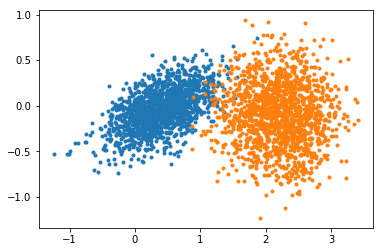

In [3]:
n_cluster =2

plt.subplot(111)
for i in range(0,n_cluster):
    p = []
    mean = []
    mean.append(np.random.uniform(-1,1)+1.98*np.float64(i))
    mean.append(np.random.uniform(-1,1)-0.75*np.float64(i))
    print("Cluter {0:d}, mean(x) = {1:5.3f}, mean(y) = {2:5.3f}".format(i,mean[0],mean[1]))
    cov = np.zeros((2,2))
    for i_cov in range(0,2):
        var=np.random.uniform(0,0.25)
        cov[i_cov,i_cov] = var

    corr = np.random.uniform(-1,1)
    cov[0,1] = corr*np.sqrt(cov[0,0]*cov[1,1])
    cov[1,0] = corr*np.sqrt(cov[0,0]*cov[1,1])
    num_random = 1500
    x,y = np.random.multivariate_normal(mean,cov,num_random).T
    p = np.column_stack((x,y))
    plt.plot(x,y,'.')
    if i==0:
        p_new = p
    else:
        p_new=np.concatenate((p_new,p))



plt.show()

Now we try to fit to this data using K-means

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(p_new)

In [5]:
for i in range(0,2):
    print("Cluster number {0:d}, reconstructed center x={1:5.3f}, y={2:5.3f}".format(i,kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1]))

Cluster number 0, reconstructed center x=2.216, y=-0.094
Cluster number 1, reconstructed center x=0.405, y=-0.045


So we see that it recovers the true centers of the clusters. Does it correctly label the elements?

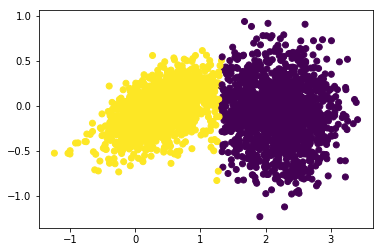

In [6]:

colour_index = np.array(kmeans.labels_,dtype=np.float)
plt.subplot(111)
x,y = zip(*p_new)
plt.scatter(x,y,c=colour_index)
plt.show()

Seems to work quite well.

### Wrong number of clusters

What if we generated data with more than two clusters, but reconstrcuted only two.

Cluter 0, mean(x) = 0.902, mean(y) = -0.385
Cluter 1, mean(x) = -3.936, mean(y) = -2.228
Cluter 2, mean(x) = -5.217, mean(y) = 5.600
Cluter 3, mean(x) = -9.340, mean(y) = -15.969


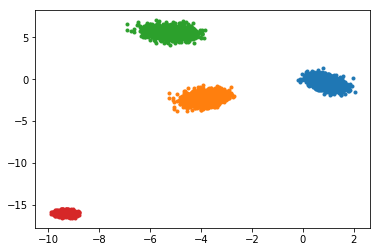

In [7]:
n_cluster =4

plt.subplot(111)
for i in range(0,n_cluster):
    p = []
    mean = []
    mean.append(np.random.uniform(-1,1)-2.938*np.float64(i))
    mean.append(np.random.uniform(-1,1)+(-1.76)**i*np.float64(i))
    print("Cluter {0:d}, mean(x) = {1:5.3f}, mean(y) = {2:5.3f}".format(i,mean[0],mean[1]))
    cov = np.zeros((2,2))
    for i_cov in range(0,2):
        var=np.random.uniform(0,0.25)
        cov[i_cov,i_cov] = var

    corr = np.random.uniform(-1,1)
    cov[0,1] = corr*np.sqrt(cov[0,0]*cov[1,1])
    cov[1,0] = corr*np.sqrt(cov[0,0]*cov[1,1])
    num_random = 1500
    x,y = np.random.multivariate_normal(mean,cov,num_random).T
    p = np.column_stack((x,y))
    plt.plot(x,y,'.')
    if i==0:
        p_new = p
    else:
        p_new=np.concatenate((p_new,p))



plt.show()

Now we try to fit this using only two clusters

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(p_new)

In [9]:
for i in range(0,2):
    print("Clusrer number {0:d}, reconstructed center x={1:5.3f}, y={2:5.3f}".format(i,kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1]))

Clusrer number 0, reconstructed center x=-2.739, y=1.006
Clusrer number 1, reconstructed center x=-9.338, y=-15.978


It sucessfully recovered one of the clusters, but seemingly agregated the other three into a single cluster.

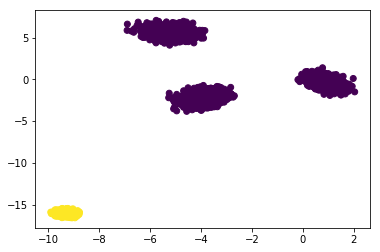

In [10]:
colour_index = np.array(kmeans.labels_,dtype=np.float)
plt.subplot(111)
x,y = zip(*p_new)
plt.scatter(x,y,c=colour_index)
plt.show()

We can use the Elbow method to determine the correct number of clusters.

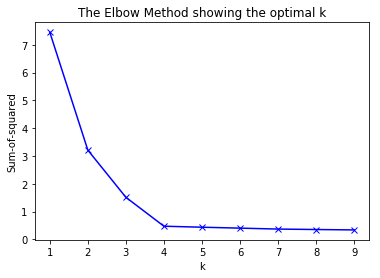

In [12]:
from scipy.spatial.distance import cdist
# k means determine k
sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(p_new)
    kmeanModel.fit(p_new)
    sse.append(sum(np.min(cdist(p_new, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / p_new.shape[0])
 
# Plot the elbow
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum-of-squared')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As you can see, 4 or more clusters is needed to minise the sum-of-squared errors of the points with respect to mean centers of each clusters. 

## Connectivity-based clustering

Here is an example where simple linkage clustering won't work

200


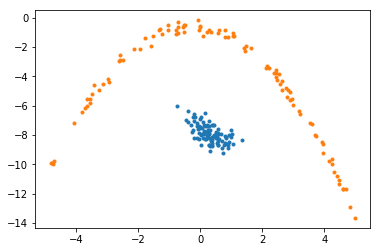

In [13]:
n_cluster =2

plt.subplot(111)
for i in range(0,n_cluster):
    p = []
    mean = []
    if i==0: #generate simple localised cluster with Gaussian errors
        mean.append(np.random.uniform(-1,1)+0.67)
        mean.append(np.random.uniform(-1,1)-7.8)
        
        cov = np.zeros((2,2))
        for i_cov in range(0,2):
            var=np.random.uniform(0,0.5)
            cov[i_cov,i_cov] = var

        corr = np.random.uniform(-1,1)
        cov[0,1] = corr*np.sqrt(cov[0,0]*cov[1,1])
        cov[1,0] = corr*np.sqrt(cov[0,0]*cov[1,1])
        num_random = 100
        x,y = np.random.multivariate_normal(mean,cov,num_random).T
    else: #generate dispersed cluster
        parameters = np.random.uniform(-1,0.1,3)
        x = np.random.uniform(-5,5,100)
        y = []
        for x_individual in x:
            y.append(parameters[0] + parameters[1]*x_individual + parameters[2]*x_individual**2 + np.random.normal(0,0.25,1))
        
        
    p = np.column_stack((x,y))
    plt.plot(x,y,'.')
    if i==0:
        p_new = p
    else:
        p_new=np.concatenate((p_new,p))


print(len(p_new))
plt.show()

If we try K-means with this, the answer won't be great.

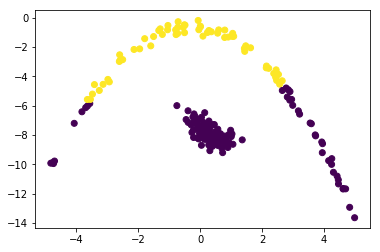

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(p_new)
colour_index = np.array(kmeans.labels_,dtype=np.float)
plt.subplot(111)
x,y = zip(*p_new)
plt.scatter(x,y,c=colour_index)
plt.show()

This doesn't look right. Instead, we should use [Connectivity-based clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
lk = linkage(p_new,method='single',metric='euclidean')

This returns a 'linkage matrix', which gives us a dengrodgam 

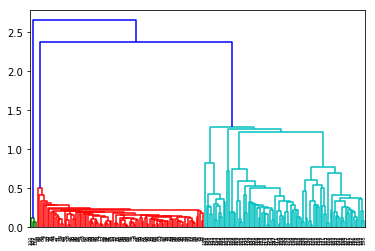

In [16]:
d=dendrogram(lk)
plt.show()

From the dendrogram, we see that the varaition is explained through two main clusters, with the addition of a third that is very similar to the second. This is probably due to the tail, at one end of the parabola.

Now we retrieve the clusters. By inspecting the dendrogram, we see we can make a cut at 1.5

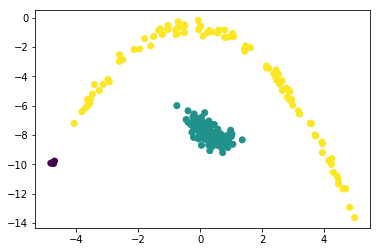

In [17]:
from scipy.cluster.hierarchy import fcluster

max_d = 1.5
clusters = fcluster(lk, max_d, criterion='distance')
colour_index = np.array(clusters,dtype=np.float)
plt.subplot(111)
x,y = zip(*p_new)
plt.scatter(x,y,c=colour_index)
plt.show()

We almost recover the input clustering! But what if we had made a slightly different cut, at 1.25 for example. 

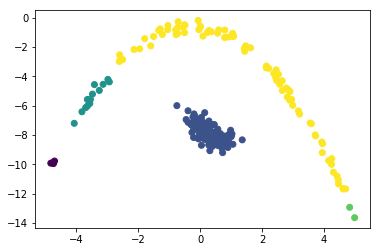

In [18]:
max_d = 1.25
clusters = fcluster(lk, max_d, criterion='distance')
colour_index = np.array(clusters,dtype=np.float)
plt.subplot(111)
x,y = zip(*p_new)
plt.scatter(x,y,c=colour_index)
plt.show()

We now have five clusters, as the tail of parabola has been isolated.